# Double / Debiased Machine Learning

ECON526

Paul Schrimpf (University of British Columbia)

# Introduction

$$
\def\indep{\perp\!\!\!\perp}
\def\Er{\mathrm{E}}
\def\R{\mathbb{R}}
\def\En{{\mathbb{E}_n}}
\def\Pr{\mathrm{P}}
\newcommand{\norm}[1]{\left\Vert {#1} \right\Vert}
\newcommand{\abs}[1]{\left\vert {#1} \right\vert}
\def\inprob{{\,{\buildrel p \over \rightarrow}\,}}
\def\indist{\,{\buildrel d \over \rightarrow}\,}
\DeclareMathOperator*{\plim}{plim}
\DeclareMathOperator*{\argmax}{arg\,max}
\DeclareMathOperator*{\argmin}{arg\,min}
$$

## Introduction

-   Many estimation tasks involve:
    -   Low dimensional parameter of interest
    -   High dimensional nuisance parameters needed to recover parameter
        of interest
-   Example: in [matching](matching.qmd)
    -   Interested in $ATE = \Er[Y(1) - Y(0)]$
    -   Nuisance parameters $\Er[Y|D,X]$ and/or $P(D=1|X)$

## Machine Learning for Nuisance Parameters

-   In [matching](matching.qmd) we said that we could use flexible
    machine learning estimators for $\Er[Y|D,X]$ and $P(D=1|X)$ and plug
    them into the doubly robust estimator

-   We will cover:

    -   Some of the technical details behind this idea
    -   How this idea can be applied to other estimators

These notes will examine the incorportion of machine learning methods in
classic econometric techniques for estimating causal effects. More
specifally, we will focus on estimating treatment effects using matching
and instrumental variables. In these estimators (and many others) there
is a low-dimensional parameter of interest, such as the average
treatment effect, but estimating it requires also estimating a
potentially high dimensional nuisance parameter, such as the propensity
score. Machine learning methods were developed for prediction with high
dimensional data. It is then natural to try to use machine learning for
estimating high dimensional nuisance parameters. Care must be taken when
doing so though because the flexibility and complexity that make machine
learning so good at prediction also pose challenges for inference.

## Example: partially linear model

$$
    y_i = \theta d_i + f(x_i) + \epsilon_i
$$

-   Interested in $\theta$
-   Assume $\Er[\epsilon|d,x] = 0$
-   Nuisance parameter $f()$

## Example: Matching

-   Binary treatment $d_i \in \{0,1\}$
-   Potential outcomes $y_i(0), y_i(1)$, observe $y_i = y_i(d_i)$
-   Interested in average treatment effect : $\theta = \Er[y_i(1) -
    y_i(0)]$
-   Covariates $x_i$
-   Assume unconfoundedness : $d_i \indep y_i(1), y_i(0) | x_i$

The partially linear and matching models are closely related. If the
conditional mean independence assumption of the partially linear model
is strengthing to conditional indepence then the partially linear model
is a special case of the matching model with constant treatment effects,
$y_i(1) - y_i(0) = \theta$. Thus the matching model can be viewed as a
generalization of the partially linear model that allows for treatment
effect heterogeneity.

## Example: Matching

-   Estimatable formulae for ATE : $$
    \begin{align*}
    \theta = & \Er\left[\frac{y_i d_i}{\Pr(d = 1 | x_i)} - \frac{y_i
        (1-d_i)}{1-\Pr(d=1|x_i)} \right] \\
    \theta = & \Er\left[\Er[y_i | d_i = 1, x_i] - \Er[y_i | d_i = 0 , x_i]\right] \\
    \theta = & \Er\left[ \begin{array}{l} d_i \frac{y_i - \Er[y_i | d_i = 1,
        x_i]}{\Pr(d=1|x_i)} - (1-d_i)\frac{y_i - \Er[y_i | d_i = 0,
        x_i]}{1-\Pr(d=1|x_i)} + \\ + \Er[y_i | d_i = 1, x_i] - \Er[y_i | d_i = 0 ,
        x_i]\end{array}\right]
    \end{align*}
    $$

## Example: IV

$$
\begin{align*}
y_i = & \theta d_i + f(x_i) + \epsilon_i \\
d_i = & g(x_i, z_i) + u_i
\end{align*}
$$

-   Interested in $\theta$
-   Assume $\Er[\epsilon|x,z] = 0$, $\Er[u|x,z]=0$
-   Nuisance parameters $f()$, $g()$

## Example: LATE

-   Binary instrumet $z_i \in \{0,1\}$
-   Potential treatments $d_i(0), d_i(1) \in \{0,1\}$, $d_i = d_i(Z_i)$
-   Potential outcomes $y_i(0), y_i(1)$, observe $y_i = y_i(d_i)$
-   Covariates $x_i$
-   $(y_i(1), y_i(0), d_i(1), d_i(0)) \indep z_i | x_i$
-   Local average treatment effect: $$
    \begin{align*}
    \theta = & \Er\left[\Er[y_i(1) - y_i(0) | x, d_i(1) > d_i(0)]\right] \\
         = & \Er\left[\frac{\Er[y|z=1,x] - \Er[y|z=0,x]}
                        {\Er[d|z=1,x]-\Er[d|z=0,x]} \right]
    \end{align*}
    $$

# Theory

## General setup

-   Parameter of interest $\theta \in \R^{d_\theta}$

-   Nuisance parameter $\eta \in T$

-   Moment conditions $$
    \Er[\psi(W;\theta_0,\eta_0) ] = 0 \in \R^{d_\theta}
    $$ with $\psi$ known

-   Estimate $\hat{\eta}$ using some machine learning method

-   Estimate $\hat{\theta}$ from $$
    \En[\psi(w_i;\hat{\theta},\hat{\eta}) ] = 0
    $$

We are following the setup and notation of Chernozhukov et al. (2018).
As in the examples, the dimension of $\theta$ is fixed and small. The
dimension of $\eta$ is large and might be increasing with sample size.
$T$ is some normed vector space.

## Example: partially linear model

$$
    y_i = \theta_0 d_i + f_0(x_i) + \epsilon_i
$$

-   Compare the estimates from

    1.  $\En[d_i(y_i - \tilde{\theta} d_i - \hat{f}(x_i)) ] = 0$

    and

    1.  $\En[(d_i - \hat{m}(x_i))(y_i - \hat{\mu}(x_i) -  \theta (d_i - \hat{m}(x_i)))] = 0$

    where $m(x) = \Er[d|x]$ and $\mu(y) = \Er[y|x]$

**Example: partially linear model** In the partially linear model,

$$
    y_i = \theta_0 d_i + f_0(x_i) + \epsilon_i
$$

we can let $w_i = (y_i, x_i)$ and $\eta = f$. There are a variety of
candidates for $\psi$. An obvious (but flawed) one is $\psi(w_i; \theta,
\eta) = (y_i - \theta_0 d_i - f_0(x_i))d_i$. With this choice of $\psi$,
we have

$$
\begin{align*}
0 = & \En[d_i(y_i - \hat{\theta} d_i - \hat{f}(x_i)) ] \\
\hat{\theta} = & \En[d_i^2]^{-1} \En[d_i (y_i - \hat{f}(x_i))] \\
(\hat{\theta} - \theta_0) = &  \En[d_i^2]^{-1} \En[d_i \epsilon_i] +
    \En[d_i^2]^{-1} \En[d_i (f_0(x_i) - \hat{f}(x_i))]
\end{align*}
$$

The first term of this expression is quite promising. $d_i$ and
$\epsilon_i$ are both finite dimensional random variables, so a law of
large numbers will apply to $\En[d_i^2]$, and a central limit theorem
would apply to $\sqrt{n} \En[d_i \epsilon_i]$. Unfortunately, the second
expression is problematic. To accomodate high dimensional $x$ and allow
for flexible $f()$, machine learning estimators must introduce some sort
of regularization to control variance. This regularization also
introduces some bias. The bias generally vanishes, but at a slower than
$\sqrt{n}$ rate. Hence

$$
\sqrt{n} \En[d_i (f_0(x_i) - \hat{f}(x_i))] \to \infty.
$$

To get around this problem, we must modify our estimate of $\theta$. Let
$m(x) = \Er[d|x]$ and $\mu(y) = \Er[y|x]$. Let $\hat{m}()$ and
$\hat{\mu}()$ be some estimates. Then we can estimate $\theta$ by
partialling out:

$$
\begin{align*}
0 = & \En[(d_i - \hat{m}(x_i))(y_i - \hat{\mu}(x_i) -  \theta (d_i - \hat{m}(x_i)))] \\
\hat{\theta} = & \En[(d_i -\hat{m}(x_i))^2]^{-1} \En[(d_i -
\hat{m}(x_i))(y_i - \hat{\mu}(x_i))] \\
(\hat{\theta} - \theta_0) = & \En[(d_i -\hat{m}(x_i))^2]^{-1} \left(\En[(d_i -
\hat{m}(x_i))\epsilon_i] + \En[(d_i - \hat{m}(x_i))(\mu(x_i) -
\hat{\mu}(x_i))] \right) \\
= & \En[(d_i -\hat{m}(x_i))^2]^{-1} \left( a + b +c + d \right)
\end{align*}
$$

where

$$
\begin{align*}
a = & \En[(d_i -m(x_i))\epsilon_i] \\
b = & \En[(m(x_i)-\hat{m}(x_i))\epsilon_i] \\
c = & \En[v_i(\mu(x_i) - \hat{\mu}(x_i))] \\
d = & \En[(m(x_i) - \hat{m}(x_i))(\mu(x_i) - \hat{\mu}(x_i))]
\end{align*}
$$

with $v_i = d_i - \Er[d_i | x_i]$. The term $a$ is well behaved and
$\sqrt{n}a \leadsto N(0,\Sigma)$ under standard conditions. Although
terms $b$ and $c$ appear similar to the problematic term in the initial
estimator, they are better behaved because $\Er[v|x] = 0$ and
$\Er[\epsilon|x] = 0$. This makes it possible, but difficult to show
that $\sqrt{n}b \to_p = 0$ and $\sqrt{n} c \to_p = 0$, see e.g. Belloni,
Chernozhukov, and Hansen (2014). However, the conditions on $\hat{m}$
and $\hat{\mu}$ needed to show this are slightly restrictive, and
appropriate conditions might not be known for all estimators.
Chernozhukov et al. (2018) describe a sample splitting modification to
$\hat{\theta}$ that allows $\sqrt{n} b$ and $\sqrt{n} c$ to vanish under
weaker conditions (essentially the same rate condition as needed for
$\sqrt{n} d$ to vanish.)

The last term, $d$, is a considerable improvement upon the first
estimator. Instead of involving the error in one estimate, it now
involes the product of the error in two estimates. By the Cauchy-Schwarz
inequality, $$
d \leq \sqrt{\En[(m(x_i) - \hat{m}(x_i))^2]} \sqrt{\En[(\mu(x_i) - \hat{\mu}(x_i))^2]}.
$$ So if the estimates of $m$ and $\mu$ converge at rates faster than
$n^{-1/4}$, then $\sqrt{n} d \to_p 0$. This $n^{-1/4}$ rate is reached
by many machine learning estimators.

## Lessons from the example

-   Need an extra condition on moments – Neyman orthogonality $$
    \partial \eta \Er[\psi(W;\theta_0,\eta_0)](\eta-\eta_0) = 0
    $$

-   Want estimators faster than $n^{-1/4}$ in the prediction norm, $$
    \sqrt{\En[(\hat{\eta}(x_i) - \eta(x_i))^2]} \lesssim_P n^{-1/4}
    $$

-   Also want estimators that satisfy something like
    $$ \sqrt{n} \En[(\eta(x_i)-\hat{\eta}(x_i))\epsilon_i] = o_p(1) $$

    -   Sample splitting / cross-fitting will make this easier

## Cross-fitting

-   Randomly partition into $K$ subsets $(I_k)_{k=1}^K$
-   $I^c_k = \{1, ..., n\} \setminus I_k$
-   $\hat{\eta}_k =$ estimate of $\eta$ using $I^c_k$
-   Estimator: $$
    \begin{align*}
    0 = & \frac{1}{K} \sum_{k=1}^K \frac{K}{n} \sum_{i \in I_k}
    \psi(w_i;\hat{\theta}^{DML},\hat{\eta}_k) \\
    0 = & \frac{1}{K} \sum_{k=1}^K \En_k[
    \psi(w_i;\hat{\theta}^{DML},\hat{\eta}_k)]
    \end{align*}
    $$

## Assumptions

1.  Neyman Orthogonality $$
    \partial \eta \Er[\psi(W;\theta_0,\eta_0)](\eta-\eta_0) \approx 0
    $$
2.  Fast enough convergence of $\hat{\eta}$ $$
    \sqrt{\Er[(\hat{\eta}_k(x_i) - \eta(x_i))^2|I_k^c]} \lesssim_P n^{-1/4}
    $$
3.  Various moments exist and other regularity conditions
4.  Moment condition linear in $\theta$ (to simplify notation only) $$
    \psi(w;\theta,\eta) = \psi^a(w;\eta) \theta + \psi^b(w;\eta)
    $$

[1]

## Asymptotic Normality

$$
\sqrt{n} \sigma^{-1} (\hat{\theta} - \theta_0) = \frac{1}{\sqrt{n}}
\sum_{i=1}^n \bar{\psi}(w_i) + o_p(1) \indist N(0,1)
$$ - Variance
$$\sigma^2 = \Er[\psi^a(w_i;\eta_0)]^{-1}  \Er\left[ \psi(w;\theta_0,\eta_0)
  \psi(w;\theta_0,\eta_0)'\right]  \Er[\psi^a(w_i;\eta_0)]^{-1}
$$ - Influence function
$$\bar{\psi}(w) = -\sigma^{-1} \Er[\psi^a(w_i;\eta_0)]^{-1} \psi(w;\theta_0,\eta_0)$$

# Creating Orthogonal Moments

## Creating orthogonal moments

-   Need $$
     \partial \eta\Er\left[\psi(W;\theta_0,\eta_0)[\eta-\eta_0] \right]  \approx 0
    $$

-   Given an some model, how do we find a suitable $\psi$?

-   Related to finding the efficient influence function, see Oliver
    Hines and Vansteelandt (2022)

## Orthogonal scores via concentrating-out

-   Original model: $$
    (\theta_0, \beta_0) = \argmax_{\theta, \beta} \Er[\ell(W;\theta,\beta)]
    $$
-   Define $$
    \eta(\theta) = \beta(\theta) = \argmax_\beta \Er[\ell(W;\theta,\beta)]
    $$
-   First order condition from $\max_\theta
    \Er[\ell(W;\theta,\beta(\theta))]$ is $$
    0 = \Er\left[ \underbrace{\frac{\partial \ell}{\partial \theta} + \frac{\partial \ell}{\partial \beta} \frac{d \beta}{d \theta}}_{\psi(W;\theta,\beta(\theta))} \right]
    $$

## Example: average derivative

-   $x,y \in \R^1$, $\Er[y|x] = f_0(x)$, $p(x) =$ density of $x$

-   $\theta_0 = \Er[f_0'(x)]$

-   Joint objective $$
    \min_{\theta,f} \Er\left[ (y - f(x))^2 + (\theta - f'(x)^2) \right]
    $$

-   Solve for minimizing $f$ given $\theta$ $$
     f_\theta(x) = \Er[y|x] - \theta \partial_x \log p(x) + f''(x) + f'(x) \partial_x \log p(x)
    $$

## Example: average derivative

-   Concentrated objective: $$
    \min_\theta \Er\left[ (y - f_\theta(x))^2 + (\theta - f_\theta'(x)^2)
    \right]
    $$

-   First order condition at $f_\theta = f_0$ gives $$
    0 = \Er\left[ (y - f_0(x))\partial_x \log p(x) + (\theta - f_0'(x)) \right]
    $$

## Orthogonal scores via Two Other Methods

-   “Orthogonal” suggests ideas from linear algebra will useful, and
    they are

-   Projection: take orthogonal to $\eta_0$ projection of moments

-   Riesz representer

Chernozhukov et al. (2018) show how to construct orthogonal scores in a
few examples via concentrating out and projection. Chernozhukov, Hansen,
and Spindler (2015) also discusses creating orthogonal scores.

# Example: Gender Wage Gap

## Data

[1] These are stated loosely, see Chernozhukov et al. (2018) for precise
conditions.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import statsmodels as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

In [2]:
cpsall = pd.read_stata("https://www.nber.org/morg/annual/morg20.dta")
# take subset of data just to reduce computation time
cps = cpsall.sample(30000, replace=False, random_state=0)
cps.describe()

8 rows × 55 columns

## Partial Linear Model

In [3]:
def partial_linear(y, d, X, yestimator, destimator, folds=3):
    """Estimate the partially linear model y = d*C + f(x) + e

    Parameters
    ----------
    y : array_like
        vector of outcomes
    d : array_like
        vector or matrix of regressors of interest
    X : array_like
        matrix of controls
    mlestimate : Estimator object for partialling out X. Must have ‘fit’
        and ‘predict’ methods.
    folds : int
        Number of folds for cross-fitting

    Returns
    -------
    ols : statsmodels regression results containing estimate of coefficient on d.
    yhat : cross-fitted predictions of y
    dhat : cross-fitted predictions of d
    """

    # we want predicted probabilities if y or d is discrete
    ymethod = "predict" if False==getattr(yestimator, "predict_proba",False) else "predict_proba"
    dmethod = "predict" if False==getattr(destimator, "predict_proba",False) else "predict_proba"
    # get the predictions
    yhat = cross_val_predict(yestimator,X,y,cv=folds,method=ymethod)
    dhat = cross_val_predict(destimator,X,d,cv=folds,method=dmethod)
    ey = np.array(y - yhat)
    ed = np.array(d - dhat)
    ols = sm.regression.linear_model.OLS(ey,ed).fit(cov_type='HC0')

    return(ols, yhat, dhat)

## Unconditional Gap

In [4]:
cps["female"] = (cps.sex==2)
cps["log_earn"] = np.log(cps.earnwke)
cps.loc[np.isinf(cps.log_earn), "log_earn"] = np.nan
cps["log_uhours"] = np.log(cps.uhourse)
cps.loc[np.isinf(cps.log_uhours), "log_uhours"] = np.nan
cps["log_hourslw"] = np.log(cps.hourslw)
cps.loc[np.isinf(cps.log_hourslw),"log_hourslw"] = np.nan
cps["log_wageu"] = cps.log_earn - cps.log_uhours
cps["log_wagelw"] = cps.log_earn - cps.log_hourslw

lm = list()
lm.append(smf.ols(formula="log_earn ~ female", data=cps,
                  missing="drop").fit(cov_type='HC0'))
lm.append( smf.ols(formula="log_wageu ~ female", data=cps,
                   missing="drop").fit(cov_type='HC0'))
lm.append(smf.ols(formula="log_wagelw ~ female", data=cps,
                  missing="drop").fit(cov_type='HC0'))
lm.append(smf.ols(formula="log_earn ~ female + log_hourslw + log_uhours", data=cps,
                  missing="drop").fit(cov_type='HC0'))
summary_col(lm, stars=True)

/home/paul/526/mine/site/env/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

divide by zero encountered in log

/home/paul/526/mine/site/env/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

divide by zero encountered in log

/home/paul/526/mine/site/env/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log


Standard errors in parentheses. 
* p<.1, ** p<.05, ***p<.01

## Adding Controls

In [5]:
from patsy import dmatrices
fmla  = "log_earn + female ~ log_uhours + log_hourslw + I(age**2) + age + C(grade92) + C(race) + C(smsastat) + C(unionmme) + C(unioncov)" #C(ind02) + C(occ2012)"
yd, X = dmatrices(fmla,cps)
female = yd[:,1]
logearn = yd[:,2];

## Estimating $\eta$

In [6]:
alphas = np.exp(np.linspace(-2, -12, 20))
lassoy = linear_model.LassoCV(cv=4, alphas=alphas, max_iter=5000).fit(X,logearn)
lassod = linear_model.LassoCV(cv=4, alphas=alphas, max_iter=5000).fit(X,female);

## Estimating $\eta$

/tmp/ipykernel_686696/2802477284.py:21: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown


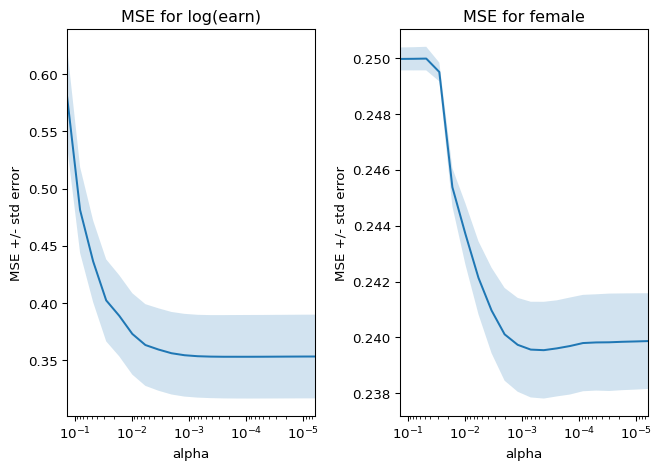

In [7]:
fig, ax = plt.subplots(1,2)

def plotlassocv(l, ax) :
    alphas = l.alphas_
    mse = l.mse_path_.mean(axis=1)
    std_error = l.mse_path_.std(axis=1)
    ax.plot(alphas,mse)
    ax.fill_between(alphas, mse + std_error, mse - std_error, alpha=0.2)

    ax.set_ylabel('MSE +/- std error')
    ax.set_xlabel('alpha')
    ax.set_xlim([alphas[0], alphas[-1]])
    ax.set_xscale("log")
    return(ax)

ax[0] = plotlassocv(lassoy,ax[0])
ax[0].set_title("MSE for log(earn)")
ax[1] = plotlassocv(lassod,ax[1])
ax[1].set_title("MSE for female")
fig.tight_layout()
fig.show()

## Estimating $\eta$

In [8]:
def pickalpha(lassocv) :
    #imin = np.argmin(lassocv.mse_path_.mean(axis=1))
    #msemin = lassocv.mse_path_.mean(axis=1)[imin]
    #se = lassocv.mse_path_.std(axis=1)[imin]
    #alpha= min([alpha for (alpha, mse) in zip(lassocv.alphas_, lassocv.mse_path_.mean(axis=1)) if mse<msemin+se])
    alpha = lassocv.alpha_
    return(alpha)

alphay = pickalpha(lassoy)
alphad = pickalpha(lassod)

## Estimate $\theta$

In [9]:
pl_lasso = partial_linear(logearn, female, X,
                          linear_model.Lasso(alpha=alphay),
                          linear_model.Lasso(alpha=alphad))
pl_lasso[0].summary(slim=True)

/home/paul/526/mine/site/env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.920e-01, tolerance: 5.128e-01


Notes: [1] R² is computed without centering (uncentered) since the model does not contain a constant. [2] Standard Errors are heteroscedasticity robust (HC0)

## Examining Predictions

/tmp/ipykernel_686696/2209979777.py:24: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown


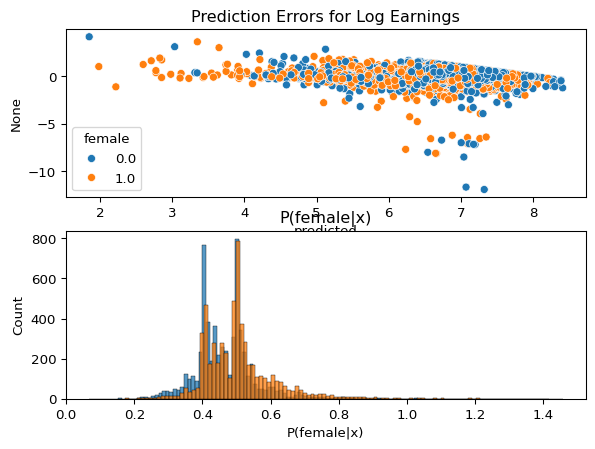

<Figure size 672x480 with 0 Axes>

In [10]:
import seaborn as sns
# Visualize predictions
def preddf(pl):
    df = pd.DataFrame({"logearn":logearn,
                       "predicted":pl[1],
                       "female":female,
                       "P(female|x)":pl[2]})
    return(df)

def plotpredictions(df) :
    fig, ax = plt.subplots(2,1)
    plt.figure()
    sns.scatterplot(x = df.predicted, y = df.logearn-df.predicted, hue=df.female, ax=ax[0])
    ax[0].set_title("Prediction Errors for Log Earnings")

    sns.histplot(df["P(female|x)"][df.female==0], kde = False,
                 label = "Male", ax=ax[1])
    sns.histplot(df["P(female|x)"][df.female==1], kde = False,
                 label = "Female", ax=ax[1])
    ax[1].set_title('P(female|x)')
    return(fig)

fig=plotpredictions(preddf(pl_lasso))
fig.show()

## Software

-   [doubleml](https://docs.doubleml.org/stable/index.html)
-   [econml](https://econml.azurewebsites.net/spec/estimation/dml.html)

## Using `doubleml`

In [11]:
import doubleml
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

dml_data = doubleml.DoubleMLData.from_arrays(X,logearn,female)
# Initialize learners
Cs = 0.0001*np.logspace(0, 4, 10)
lasso = make_pipeline(StandardScaler(), LassoCV(cv=5, max_iter=10000))
lasso_class = make_pipeline(StandardScaler(),
                            LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear',
                                                 Cs = Cs, max_iter=1000))

np.random.seed(123)
dml_plr_lasso = doubleml.DoubleMLPLR(dml_data,
                                     ml_l = lasso,
                                     ml_m = lasso_class,
                                     n_folds = 3)
dml_plr_lasso.fit(store_predictions=True)
print(dml_plr_lasso.summary)

       coef   std err          t         P>|t|     2.5 %   97.5 %
d -0.181669  0.011178 -16.252139  2.157063e-59 -0.203578 -0.15976

## Visualizing Predictions: Lasso & Logistic Lasso

/tmp/ipykernel_686696/2620613555.py:8: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown


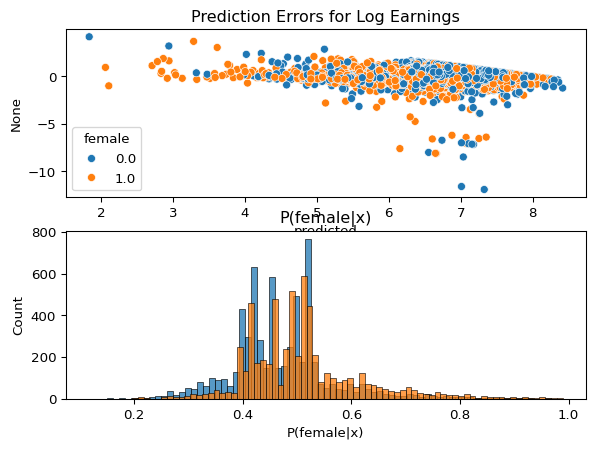

<Figure size 672x480 with 0 Axes>

In [12]:
def dmlpreddf(dml_model):
    df=pd.DataFrame({"logearn":logearn,
                     "predicted":dml_model.predictions['ml_l'].flatten(),
                     "female":female,
                     "P(female|x)":dml_model.predictions['ml_m'].flatten()})
    return(df)

plotpredictions(dmlpreddf(dml_plr_lasso)).show()

## With Gradient Boosted Trees

In [13]:
from lightgbm import LGBMClassifier, LGBMRegressor
ylearner = LGBMRegressor(force_col_wise=True)
dlearner = LGBMClassifier(force_col_wise=True)
dml_plr_gbt = doubleml.DoubleMLPLR(dml_data, ylearner, dlearner)
dml_plr_gbt.fit(store_predictions=True)
print(dml_plr_gbt.summary)

/home/paul/526/mine/site/env/lib/python3.12/site-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.



[LightGBM] [Info] Total Bins 292
[LightGBM] [Info] Number of data points in the train set: 9630, number of used features: 28
[LightGBM] [Info] Start training from score 6.719951
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 9630, number of used features: 28
[LightGBM] [Info] Start training from score 6.715158
[LightGBM] [Info] Total Bins 292
[LightGBM] [Info] Number of data points in the train set: 9630, number of used features: 28
[LightGBM] [Info] Start training from score 6.719371
[LightGBM] [Info] Total Bins 289
[LightGBM] [Info] Number of data points in the train set: 9631, number of used features: 28
[LightGBM] [Info] Start training from score 6.719395
[LightGBM] [Info] Total Bins 289
[LightGBM] [Info] Number of data points in the train set: 9631, number of used features: 28
[LightGBM] [Info] Start training from score 6.714159
[LightGBM] [Info] Number of positive: 4711, number of negative: 4919
[LightGBM] [Info] Total Bins 292
[LightGB

## Visualizing Predictions: Trees

/tmp/ipykernel_686696/3703839926.py:1: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown


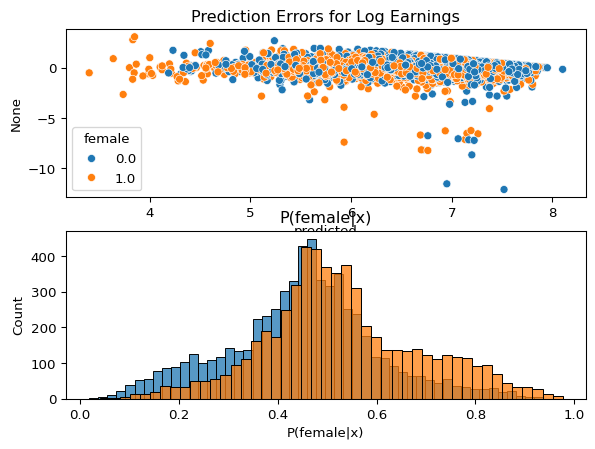

<Figure size 672x480 with 0 Axes>

In [14]:
plotpredictions(dmlpreddf(dml_plr_gbt)).show()

## Interactive Regression Model

-   Similar to matching, the partially linear regression model can
    suffer from misspecification bias if the effect of $D$ varies with
    $X$
-   Interactive regression model: $$
    \begin{align*}
    Y & = g_0(D,X) + U \\
    D & = m_0(X) + V
    \end{align*}
    $$
-   Mechanics same as matching heterogeneous effects
-   Orthogonal moment condition is same as doubly robust matching

## Interactive Regression Model - Lasso

In [15]:
np.random.seed(123)
dml_irm_lasso = doubleml.DoubleMLIRM(dml_data,
                                     ml_g = lasso,
                                     ml_m = lasso_class,
                                     trimming_threshold = 0.01,
                                     n_folds = 3)
dml_irm_lasso.fit()
dml_irm_lasso.summary

## Interactive Regression Model - Trees

In [16]:
np.random.seed(123)
dml_irm_gbt = doubleml.DoubleMLIRM(dml_data,
                                     ml_g = ylearner,
                                     ml_m = dlearner,
                                     trimming_threshold = 0.01,
                                     n_folds = 3)
dml_irm_gbt.fit()
dml_irm_gbt.summary

[LightGBM] [Info] Total Bins 257
[LightGBM] [Info] Number of data points in the train set: 4119, number of used features: 25
[LightGBM] [Info] Start training from score 6.868347
[LightGBM] [Info] Total Bins 252
[LightGBM] [Info] Number of data points in the train set: 4118, number of used features: 23
[LightGBM] [Info] Start training from score 6.859271
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 4119, number of used features: 24
[LightGBM] [Info] Start training from score 6.857057
[LightGBM] [Info] Total Bins 254
[LightGBM] [Info] Number of data points in the train set: 3906, number of used features: 22
[LightGBM] [Info] Start training from score 6.576155
[LightGBM] [Info] Total Bins 263
[LightGBM] [Info] Number of data points in the train set: 3907, number of used features: 24
[LightGBM] [Info] Start training from score 6.567823
[LightGBM] [Info] Total Bins 253
[LightGBM] [Info] Number of data points in the train set: 3907, number of use

## Sources and Further Reading

-   These slides borrow heavily from [my notes on machine learning in
    economics](https://schrimpf.github.io/NeuralNetworkEconomics.jl/ml-intro/)
-   The example is from [my chapter on machine learning in QuantEcon:
    DataScience](https://datascience.quantecon.org/applications/ml_in_economics.html#estimation-of-nuisance-functions)
-   Chernozhukov et al. (2017) : short introduction to main idea
-   Chernozhukov et al. (2018) : underlying theory
-   Knaus (2022) : approachable review of DML for doubly robust matching

## References

Belloni, Alexandre, Victor Chernozhukov, and Christian Hansen. 2014.
“Inference on Treatment Effects After Selection Among High-Dimensional
Controls†.” *The Review of Economic Studies* 81 (2): 608–50.
<https://doi.org/10.1093/restud/rdt044>.

Chernozhukov, Victor, Denis Chetverikov, Mert Demirer, Esther Duflo,
Christian Hansen, and Whitney Newey. 2017. “Double/Debiased/Neyman
Machine Learning of Treatment Effects.” *American Economic Review* 107
(5): 261–65. <https://doi.org/10.1257/aer.p20171038>.

Chernozhukov, Victor, Denis Chetverikov, Mert Demirer, Esther Duflo,
Christian Hansen, Whitney Newey, and James Robins. 2018.
“Double/Debiased Machine Learning for Treatment and Structural
Parameters.” *The Econometrics Journal* 21 (1): C1–68.
<https://doi.org/10.1111/ectj.12097>.

Chernozhukov, Victor, Christian Hansen, and Martin Spindler. 2015.
“Valid Post-Selection and Post-Regularization Inference: An Elementary,
General Approach.” *Annual Review of Economics* 7 (1): 649–88.
<https://doi.org/10.1146/annurev-economics-012315-015826>.

Knaus, Michael C. 2022. “<span class="nocase">Double machine
learning-based programme evaluation under unconfoundedness</span>.” *The
Econometrics Journal* 25 (3): 602–27.
<https://doi.org/10.1093/ectj/utac015>.

Oliver Hines, Karla Diaz-Ordaz, Oliver Dukes, and Stijn Vansteelandt.
2022. “Demystifying Statistical Learning Based on Efficient Influence
Functions.” *The American Statistician* 76 (3): 292–304.
<https://doi.org/10.1080/00031305.2021.2021984>.